In [1]:
# Import dependencies
from pathlib import Path 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import & Inspect the Data

In [2]:
# Loading data
file_path = Path("../Cleaned_Data/1950-2020_tornadoes_cleaned.csv")
tornado_df = pd.read_csv(file_path)

In [3]:
tornado_df.columns

Index(['Timestamp', 'Year', 'Month', 'Day', 'State', 'Start_Lat', 'Start_Lon',
       'End_Lat', 'End_Lon', 'EF', 'Injuries', 'Fatalities', 'Loss',
       'Crop_Loss', 'Length', 'Width'],
      dtype='object')

In [4]:
# drop na columns
tornado_df = tornado_df.dropna()
tornado_df

,Timestamp,Year,Month,Day,State,Start_Lat,Start_Lon,End_Lat,End_Lon,EF,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
41903,2000-06-01 17:06:00,2000,6,1,WI,43.4000,-88.6300,43.3800,-88.3700,2,0,0,1110000.0,400000.0,17.00,120
49035,2006-12-31 14:45:00,2006,12,31,GA,32.2700,-83.7300,32.2700,-83.7300,2,1,0,150000.0,250000.0,0.46,50
50046,2007-10-18 17:10:00,2007,10,18,KY,37.8100,-87.0000,37.8900,-86.7700,2,0,0,200000.0,50000.0,13.93,200
50056,2007-10-18 18:32:00,2007,10,18,KY,37.6200,-87.4800,37.7200,-87.1800,2,4,0,900000.0,200000.0,17.26,360
50070,2007-10-18 20:03:00,2007,10,18,IN,38.4700,-85.5500,38.5100,-85.4800,3,0,0,1000000.0,10000.0,4.80,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66897,2020-08-27 17:45:00,2020,8,27,AR,35.3051,-91.1835,35.3171,-91.2003,0,0,0,20000.0,5000.0,1.26,50
66918,2020-08-29 15:26:00,2020,8,29,NY,42.9390,-73.7000,42.9380,-73.6950,1,1,0,35000.0,20000.0,0.26,50
66919,2020-08-29 15:42:00,2020,8,29,NY,42.9160,-73.5950,42.8982,-73.5596,1,0,0,45000.0,30000.0,2.17,100
66971,2020-08-06 14:02:00,2020,8,6,VA,38.2210,-78.8770,38.2090,-78.8320,0,0,0,150000.0,100000.0,2.58,100


## Machine Learning

In [5]:
# Import Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Random Forest -- feature importance

This algorithm takes inputs (Injuries,	Fatalities,	Loss,	Crop_Loss,	Length, &	Width) to predict EF Rating

#### 1. Define input data (X) and output data (y)

In [6]:
X = tornado_df.copy()
X = X.drop(['Timestamp', 'Year', 'Month', 'Day', 'State', 'Start_Lat', 'Start_Lon','End_Lat', 'End_Lon','EF'], axis=1)
X

,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
41903,0,0,1110000.0,400000.0,17.00,120
49035,1,0,150000.0,250000.0,0.46,50
50046,0,0,200000.0,50000.0,13.93,200
50056,4,0,900000.0,200000.0,17.26,360
50070,0,0,1000000.0,10000.0,4.80,440
...,...,...,...,...,...,...
66897,0,0,20000.0,5000.0,1.26,50
66918,1,0,35000.0,20000.0,0.26,50
66919,0,0,45000.0,30000.0,2.17,100
66971,0,0,150000.0,100000.0,2.58,100


In [7]:
y = tornado_df["EF"].ravel()
y[:10]

array([2, 2, 2, 2, 3, 1, 1, 2, 0, 2], dtype=int64)

#### 2. Splitting into Train and Test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 3. Scale the input data (X)

In [9]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### 4. Fitting the Random Forest Model

In [10]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [11]:
 # Fitting the model
model = rf_model.fit(X_train_scaled, y_train)

#### 5. Making Predictions Using Random Forest Model

In [12]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 2, 1, 0, 3, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 3,
       1, 1, 2, 2, 1, 3, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 4, 1, 2, 2,
       0, 0, 1, 0, 3, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 3,
       1, 3, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 2, 1, 1, 0, 1, 4, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 3,
       1, 3, 1, 0, 1, 2, 1, 0, 3, 0, 1, 1, 1, 1, 0], dtype=int64)

#### 6. Model Evaluation

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2", "Actual 3","Actual 4","Actual 5"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3","Predicted 4","Predicted 5"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [14]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 0,22,22,0,0,0,0
Actual 1,11,48,8,0,0,0
Actual 2,0,16,22,4,0,0
Actual 3,0,0,6,7,0,0
Actual 4,0,0,0,1,1,0
Actual 5,0,0,0,0,1,0


Accuracy Score : 0.591715976331361
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        44
           1       0.56      0.72      0.63        67
           2       0.61      0.52      0.56        42
           3       0.58      0.54      0.56        13
           4       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         1

    accuracy                           0.59       169
   macro avg       0.49      0.46      0.47       169
weighted avg       0.60      0.59      0.59       169



C:\Users\Nat\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nat\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nat\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 7. Rank the Importance of Features

In [15]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_

In [16]:
# We can sort the features by their importance.
feature_sort = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
feature_sort

[(0.2878993698787686, 'Loss'),
 (0.2399446116717991, 'Width'),
 (0.2266150348137891, 'Length'),
 (0.17126224977242055, 'Crop_Loss'),
 (0.05851391592127216, 'Injuries'),
 (0.01576481794195051, 'Fatalities')]

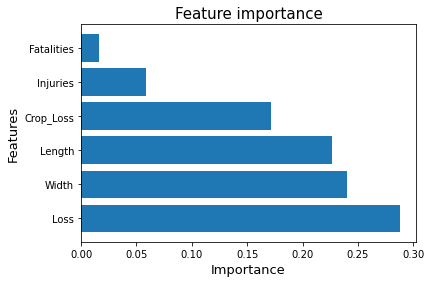

In [17]:
# Plot Feature Importance
features_sorted = []
importance_sorted = []

for i in feature_sort:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

plt.title("Feature importance", fontsize=15)
plt.xlabel("Importance", fontsize=13)
plt.ylabel("Features", fontsize=13)

plt.barh(range(len(importance_sorted)), importance_sorted,)
plt.yticks(range(len(importance_sorted)), features_sorted);